Mínimos cuadrados ordinarios (regresión lineal)
===

* El modelo lineal se define como:

$$
\hat{y}(w,x)=w_0 + w_1 x_1 + \cdots + w_p x_p 
$$

* En la regresión lineal, los parámetros son calculados minimizando la suma de residuales al cuadrado:

$$
\min_w ||Xw -y||_2^2 = \min_w ||e||_2^2
$$

![assets/regxy.jpg](assets/regxy.jpg) 

* La estimación de los parámetros del modelo minimizando el MSE supone que los errores siguen una distribución normal con media cero y varianza finita y constante. 

* Si las características están correlacionadas (dependencia lineal aproximada), los resultados son altamente sensitivos a los errores aleatorios en la variable objetivo.

[]

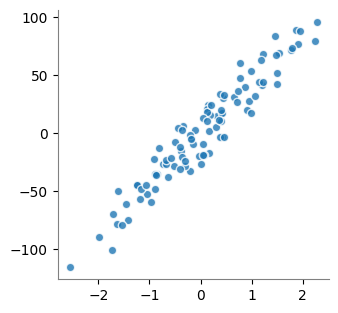

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y_true = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    #
    # Intecepto
    bias=0.0,
    #
    # numero de vectores singulares para explicar
    # los datos
    effective_rank=None,
    #
    # importancia relativa de las colas
    tail_strength=0.9,
    noise=12.0,
    shuffle=False,
    coef=False,
    random_state=0,
)

plt.figure(figsize=(3.5, 3.5))
plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()

In [2]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression(
    # -------------------------------------------------------------------------
    # Ajusta el intercepto?
    fit_intercept=True,
)

linearRegression.fit(X, y_true)

display(
    linearRegression.coef_,
    linearRegression.intercept_,
    linearRegression.score(X, y_true),
)

array([42.66621538])

-0.9770181924368713

0.9183527010047458

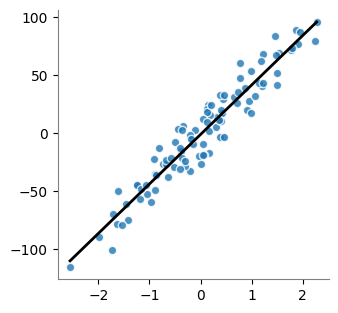

In [3]:
import numpy as np

line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
y_pred = linearRegression.predict(line_X)

plt.figure(figsize=(3.5, 3.5))

plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.plot(line_X, y_pred, "k", linewidth=2)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

* Este modelo es altamente sensible a outliers

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

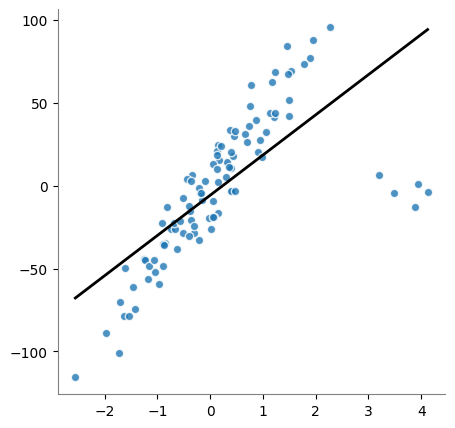

In [4]:
import numpy as np

n_outliers = 5

np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y_true[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

linearRegression.fit(X, y_true)

line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
y_pred = linearRegression.predict(line_X)

plt.figure(figsize=(5, 5))

plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.plot(line_X, y_pred, "k", linewidth=2)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()